In [2]:
import torch
import torchvision
from torchvision import datasets, transforms, models

In [3]:
# Load the pre-trained model
resnet = models.resnet50(weights=models.ResNet50_Weights) # Same as pretrained=True

print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

C:\Users\4311698\.conda\envs\cudaenv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [4]:
# Specify image transformations
transform = transforms.Compose([ # Defining the variable
    transforms.Resize(256), # Resize the image to 256×256 pixels
    transforms.CenterCrop(224), #Crop the image to 224×224 pixels about the center
    transforms.ToTensor(), # Convert the image to PyTorch Tensor data type
    transforms.Normalize( # Normalize the image by setting its mean and standard deviation to the specified values
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225])
])

In [11]:
# Load the input image and pre-process it
from PIL import Image
img = Image.open("dog.jfif")

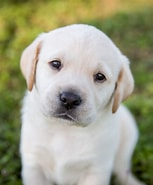

In [12]:
img

In [13]:
img_t = transform(img)
batch_t = torch.unsqueeze(img_t, 0) # Change to batch format [from (channels, height, width) to (batch_size, channels, height, width)]

In [14]:
# Model Inference
resnet.eval()
out = resnet(batch_t)
print(out.shape)

torch.Size([1, 1000])


In [15]:
with open('imagenet_classes.txt') as f:
    classes = [line.strip() for line in f.readlines()]
print(classes[0])


0, tench


In [16]:
_, indices = torch.sort(out, descending=True)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
[(classes[idx], f"{percentage[idx].item():.2f}%") for idx in indices[0][:5]]

[('208, Labrador_retriever', '99.39%'),
 ('207, golden_retriever', '0.23%'),
 ('222, kuvasz', '0.17%'),
 ('179, Staffordshire_bullterrier', '0.05%'),
 ('180, American_Staffordshire_terrier', '0.03%')]